In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from rubin_sim.maf import radar, norm_df

In [2]:
df = pd.read_pickle('combined_stats.pkl')

In [3]:
name_dict = {'best18k parallax  HealpixSlicer': 'parallax',
            'best18k properMotion  HealpixSlicer': 'proper motion',
            'Fraction detected of total (mean) MicrolensingMetric_detect tE 5_10 days UserPointsSlicer': 'fast microlensing',
            'Fraction detected of total (mean) MicrolensingMetric_detect tE 60_90 days UserPointsSlicer': 'slow microlensing',
            'fONv MedianNvis fO  HealpixSlicer': 'fO N vis',
            'DifferentialCompleteness H = 16.000000 Discovery_N_Chances NEO 3 pairs in 15 nights trailing loss MoObjSlicer': 'NEO bright',
            'DifferentialCompleteness H = 22.000000 Discovery_N_Chances NEO 3 pairs in 15 nights trailing loss MoObjSlicer': 'NEO faint',
            'DifferentialCompleteness H = 6.000000 Discovery_N_Chances TNO 3 pairs in 15 nights trailing loss MoObjSlicer': 'TNO',
             'Total detected SNNSNMetric_nSN  HealpixSlicer': 'SNe',
            'Total detected TDE_Quality__some_color_pnum  UserPointsSlicer': 'TDE',
            '3x2ptFoM ExgalM5_with_cuts i band non-DD year 10 HealpixSlicer': '3x2',
            'Median WeakLensingNvisits i band non-DD HealpixSlicer': 'WL',
            'Sum PrestoKNe__scoreS  UserPointsSlicer': 'Transients',}
invert_cols = ['parallax', 'proper motion']

data = pd.DataFrame()
for key in name_dict:
    data[name_dict[key]] = df[key]



In [4]:
df

metric,Length of Survey (days),"NChanges filter, observationStartMJD",OpenShutterFraction,tEff,Number of Exposures,Sum SkySaturation,Slew Count All visits,Mean slewTime All visits,Median slewTime All visits,Min slewTime All visits,...,"Counts_ToO, 89_t8","Counts_ToO, 95_t0","Counts_ToO, 95_t1","Counts_ToO, 95_t2","Counts_ToO, 95_t4","Counts_ToO, 96_t0","Counts_ToO, 96_t1","Counts_ToO, 96_t2","Counts_ToO, 96_t4","Counts_ToO, 96_t8"
run_name,,,,,,,,,,,,,,,,,,,,,
baseline_retrofoot_v2.0_10yrs,3652.104322,34678.0,0.722316,0.588588,2086534.0,0.0,2086534.0,7.728750,4.832924,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
baseline_v2.0_10yrs,3652.104333,34812.0,0.722458,0.569799,2086980.0,0.0,2086980.0,7.718367,4.824469,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bluer_indx0_v2.0_10yrs,3652.104250,34488.0,0.722881,0.568914,2088051.0,0.0,2088051.0,7.692650,4.824003,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bluer_indx1_v2.0_10yrs,3652.104303,34491.0,0.723220,0.571559,2089107.0,0.0,2089107.0,7.697270,4.824258,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
carina_v2.0_10yrs,3652.104419,30852.0,0.722543,0.565177,2087222.0,0.0,2087222.0,7.714250,4.832211,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vary_nes_nesfrac0.50_v2.0_10yrs,3652.104304,34714.0,0.722805,0.562693,2087928.0,0.0,2087928.0,7.692723,4.819081,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vary_nes_nesfrac0.55_v2.0_10yrs,3652.104066,34901.0,0.722719,0.560747,2087662.0,0.0,2087662.0,7.695154,4.818339,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vary_nes_nesfrac0.75_v2.0_10yrs,3652.104485,34940.0,0.722869,0.552520,2088056.0,0.0,2088056.0,7.678876,4.813409,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns[1000]

'CumulativeCompleteness@Time@H=18.00 H <=18.0 @ 61373.83 Discovery_Time Trojan 3 pairs in 15 nights detection loss MoObjSlicer'

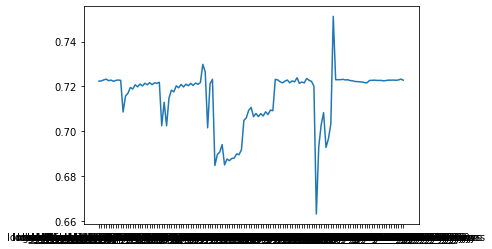

In [6]:
plt.plot(df['OpenShutterFraction'])

In [7]:
df['OpenShutterFraction'].values.max()

0.7512253546069011

In [8]:
~np.isfinite(df['Median SurfaceBrightLimit r HealpixSlicer'].values)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [9]:
[ack for ack in df.columns if 'SNN' in ack]

['Median SNNSNMetric_nSN  HealpixSlicer',
 'Mean SNNSNMetric_nSN  HealpixSlicer',
 'Total detected SNNSNMetric_nSN  HealpixSlicer',
 'Total on sky SNNSNMetric_nSN  HealpixSlicer',
 'Median SNNSNMetric_zlim  HealpixSlicer',
 'Mean SNNSNMetric_zlim  HealpixSlicer',
 'Total detected SNNSNMetric_zlim  HealpixSlicer',
 'Total on sky SNNSNMetric_zlim  HealpixSlicer']

In [48]:
runs = [run for run in df.index if 'baseline' in run]

Text(0, 0.5, 'N SNe')

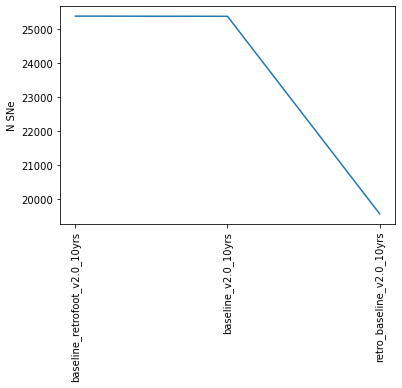

In [49]:
# Turning on rolling gives a big boost in SNe
fig, ax = plt.subplots()
ax.plot(df['Total detected SNNSNMetric_nSN  HealpixSlicer'][runs])
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('N SNe')

In [50]:

ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0_10yrs')


In [51]:
ndata

,parallax,proper motion,fast microlensing,slow microlensing,fO N vis,NEO bright,NEO faint,TNO,SNe,TDE,3x2,WL,Transients
run_name,,,,,,,,,,,,,
baseline_retrofoot_v2.0_10yrs,1.025425,1.042678,0.298734,0.481793,1.042908,0.995913,0.991552,0.973765,1.000218,1.014069,0.896675,1.037634,0.994413
baseline_v2.0_10yrs,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
retro_baseline_v2.0_10yrs,0.983502,1.041805,0.243671,0.357843,1.010727,0.978060,1.003168,0.982099,0.770948,0.909338,0.913416,1.000000,0.871508


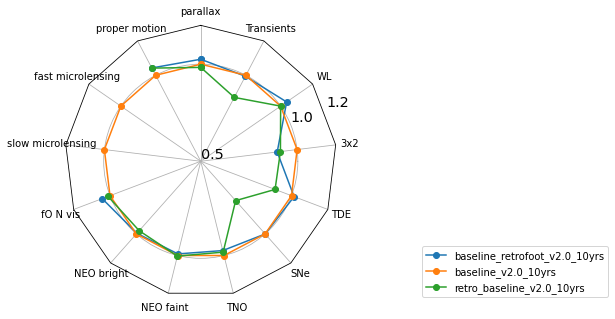

In [52]:


fig, ax = radar(ndata, legend=True, rgrids=[0.5, 1.0, 1.2], bbox_to_anchor=(2, 0))


Text(0, 0.5, 'MBA')

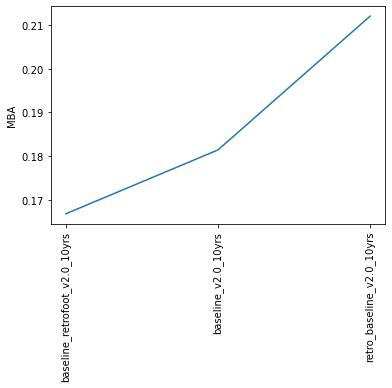

In [59]:
mba = 'DifferentialCompleteness H = 21.000000 Discovery_N_Chances MBA 3 pairs in 15 nights trailing loss MoObjSlicer'
fig, ax = plt.subplots()
ax.plot(df[mba][runs])
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('MBA')

In [60]:
df[mba][runs]

run_name
baseline_retrofoot_v2.0_10yrs    0.166833
baseline_v2.0_10yrs              0.181436
retro_baseline_v2.0_10yrs        0.212042
Name: DifferentialCompleteness H = 21.000000 Discovery_N_Chances MBA 3 pairs in 15 nights trailing loss MoObjSlicer, dtype: float64

In [15]:
runs = ['baseline_v2.0_10yrs'] + [run for run in df.index if 'blue' in run]

In [16]:
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0_10yrs')


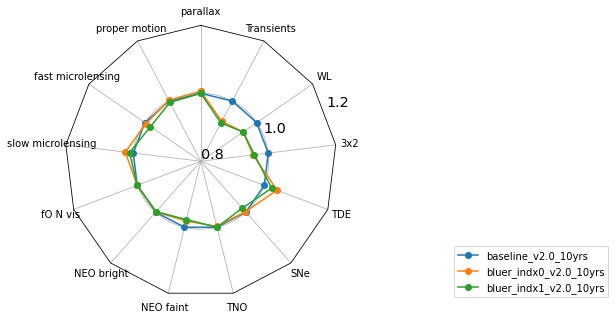

In [17]:
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))


In [18]:
runs = ['baseline_v2.0_10yrs'] + [run for run in df.index if 'long_u' in run]
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0_10yrs')


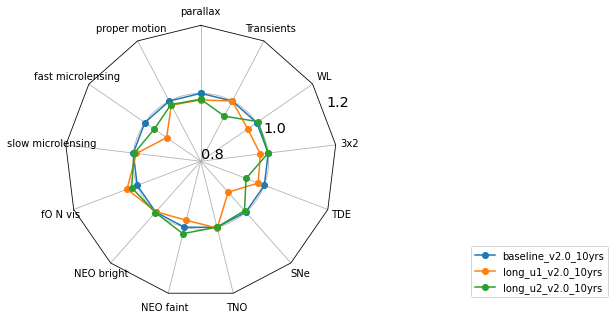

In [19]:
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))


In [20]:
runs = ['baseline_v2.0_10yrs'] + [run for run in df.index if 'rolling_ns' in run]
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0_10yrs')


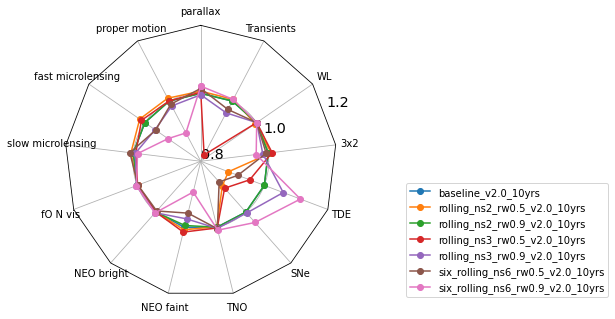

In [21]:
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))


In [22]:
runs = ['baseline_v2.0_10yrs'] + [run for run in df.index if 'roll_' in run]
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0_10yrs')


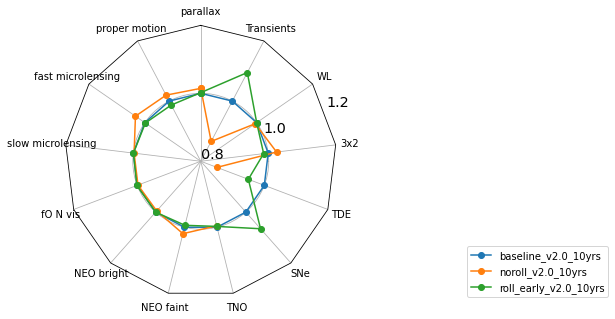

In [23]:
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))


In [24]:
runs = ['baseline_v2.0_10yrs'] + [run for run in df.index if 'rolling_bul' in run]
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0_10yrs')


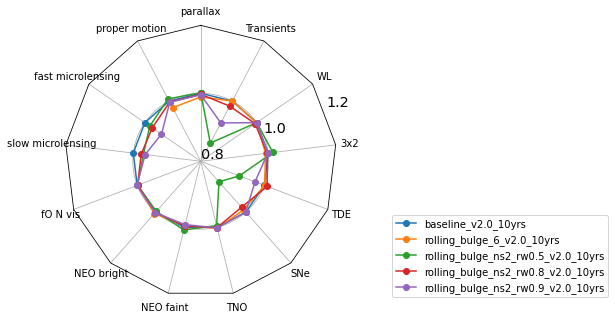

In [25]:
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))


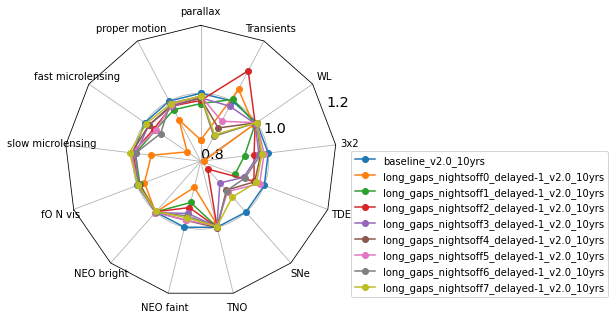

In [26]:
runs = ['baseline_v2.0_10yrs'] + [run for run in df.index if 'long_gaps_night' in run and '-1' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0_10yrs')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))


Text(0, 0.5, 'Transient Score')

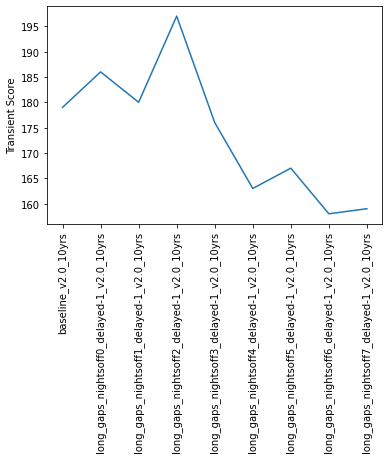

In [27]:
fig, ax = plt.subplots()
ax.plot(df['Sum PrestoKNe__scoreS  UserPointsSlicer'][runs])
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('Transient Score')

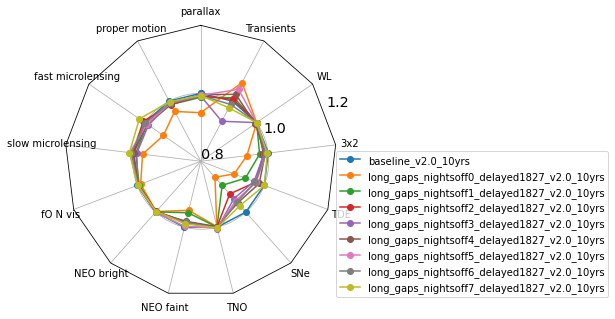

In [28]:
runs = ['baseline_v2.0_10yrs'] + [run for run in df.index if 'long_gaps_night' in run and '18' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0_10yrs')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))


Text(0, 0.5, 'Transient Score')

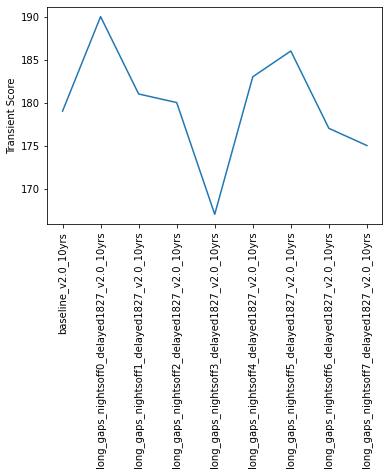

In [29]:
fig, ax = plt.subplots()
ax.plot(df['Sum PrestoKNe__scoreS  UserPointsSlicer'][runs])
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('Transient Score')

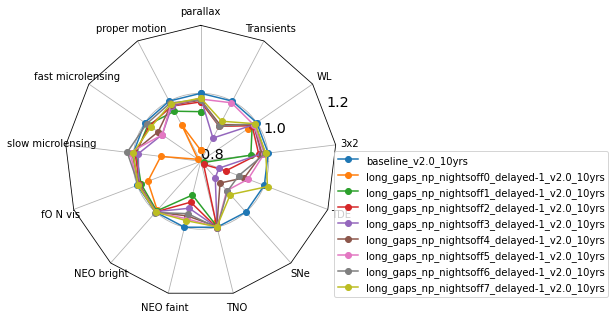

In [32]:
runs = ['baseline_v2.0_10yrs'] + [run for run in df.index if 'long_gaps_np' in run and '-1' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0_10yrs')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))


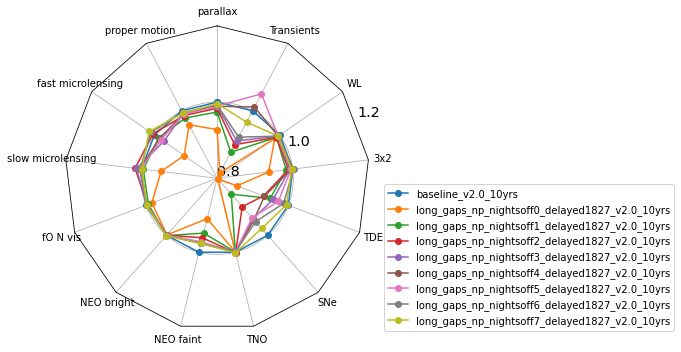

In [34]:
runs = ['baseline_v2.0_10yrs'] + [run for run in df.index if 'long_gaps_np' in run and '18' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0_10yrs')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.tight_layout()

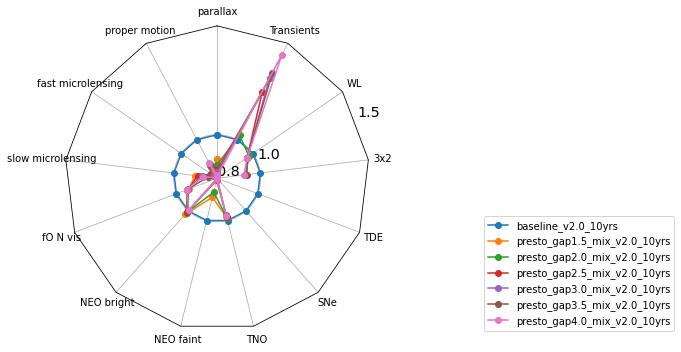

In [43]:
runs = ['baseline_v2.0_10yrs'] + [run for run in df.index if 'presto_gap' in run and 'mix' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0_10yrs')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.5], bbox_to_anchor=(2, 0))
fig.tight_layout()

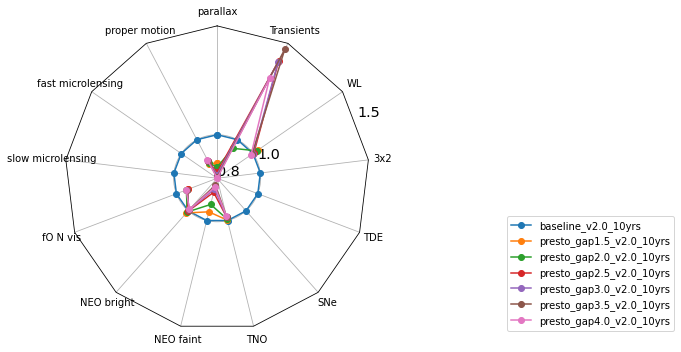

In [39]:
runs = ['baseline_v2.0_10yrs'] + [run for run in df.index if 'presto_gap' in run and 'mix' not in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0_10yrs')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.5], bbox_to_anchor=(2, 0))
fig.tight_layout()

Text(0, 0.5, 'Transient Score')

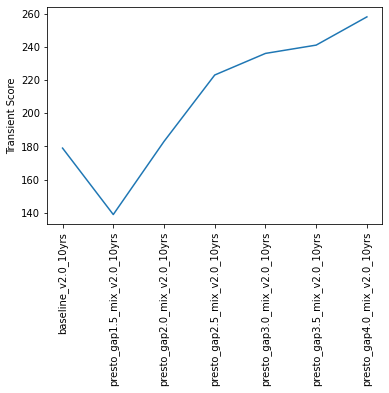

In [44]:
fig, ax = plt.subplots()
ax.plot(df['Sum PrestoKNe__scoreS  UserPointsSlicer'][runs])
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('Transient Score')

Text(0, 0.5, 'Transient Score')

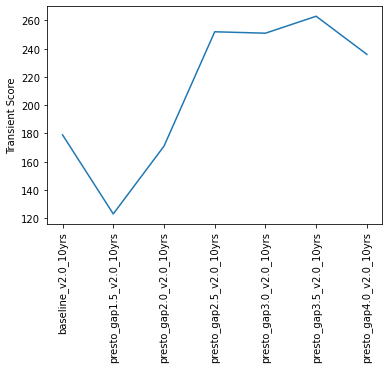

In [40]:
fig, ax = plt.subplots()
ax.plot(df['Sum PrestoKNe__scoreS  UserPointsSlicer'][runs])
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('Transient Score')

Text(0, 0.5, 'N SNe')

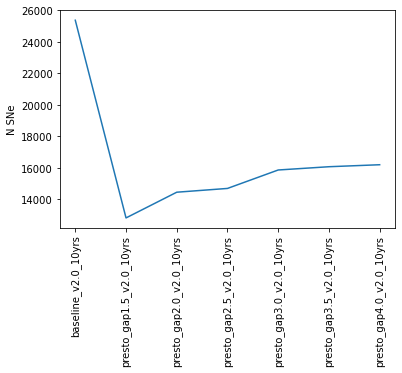

In [41]:
fig, ax = plt.subplots()
ax.plot(df['Total detected SNNSNMetric_nSN  HealpixSlicer'][runs])
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('N SNe')

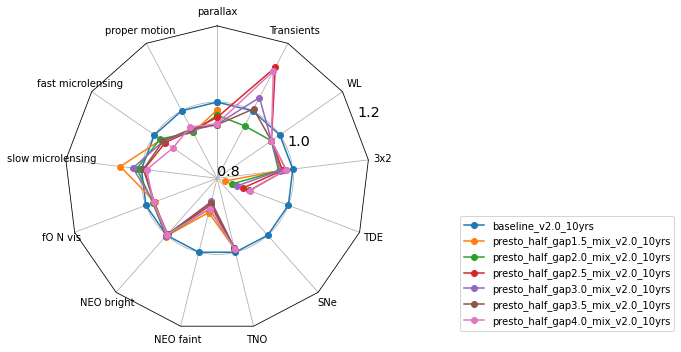

In [46]:
runs = ['baseline_v2.0_10yrs'] + [run for run in df.index if 'presto_half' in run and 'mix' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0_10yrs')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.tight_layout()

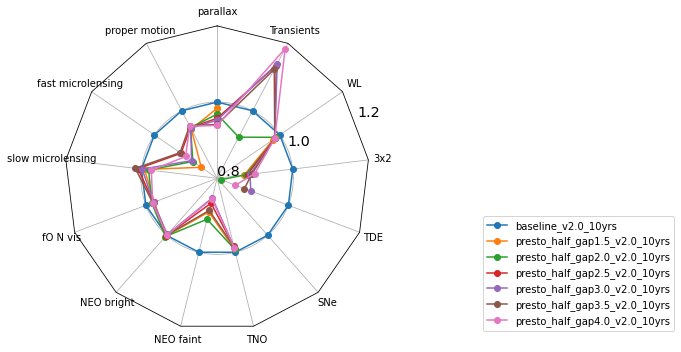

In [47]:
runs = ['baseline_v2.0_10yrs'] + [run for run in df.index if 'presto_half' in run and 'mix' not in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0_10yrs')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.tight_layout()

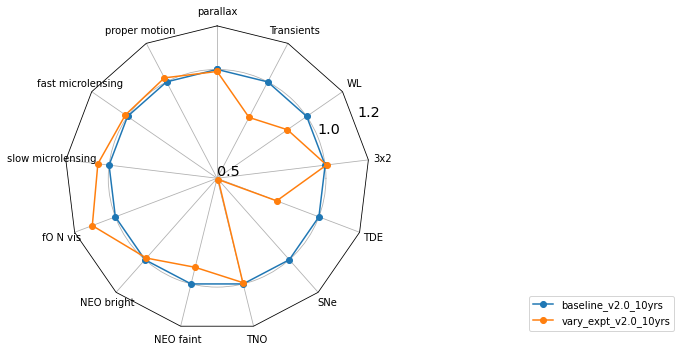

In [62]:
runs = ['baseline_v2.0_10yrs'] + [run for run in df.index if 'vary_expt' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0_10yrs')
fig, ax = radar(ndata, legend=True, rgrids=[0.5, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.tight_layout()

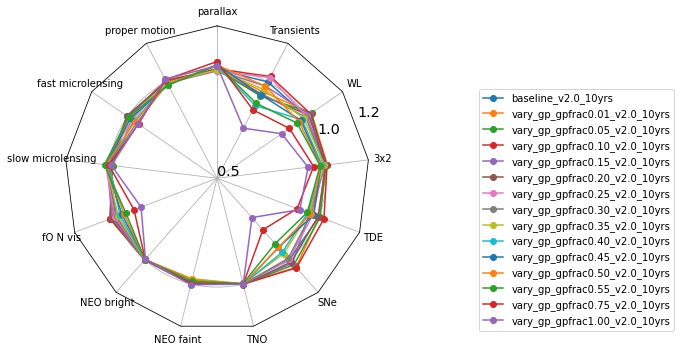

In [63]:
runs = ['baseline_v2.0_10yrs'] + [run for run in df.index if 'vary_gp' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0_10yrs')
fig, ax = radar(ndata, legend=True, rgrids=[0.5, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.tight_layout()

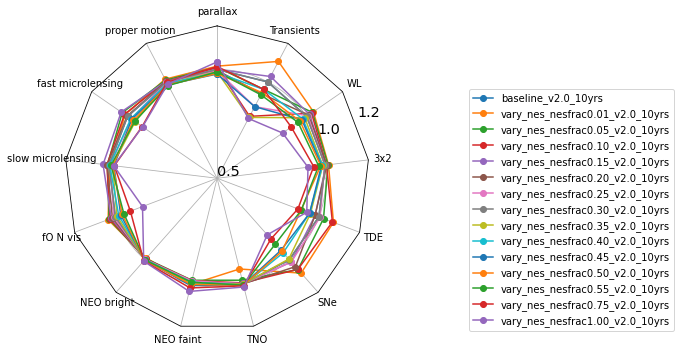

In [64]:
runs = ['baseline_v2.0_10yrs'] + [run for run in df.index if 'vary_nes' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0_10yrs')
fig, ax = radar(ndata, legend=True, rgrids=[0.5, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.tight_layout()

Text(0, 0.5, 'OCC_r5, H=16')

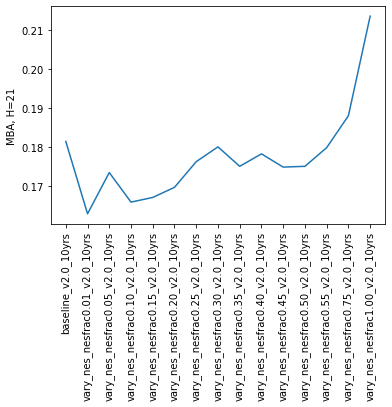

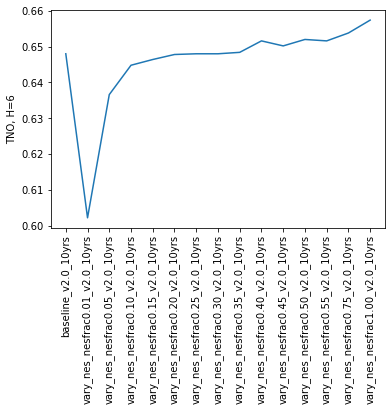

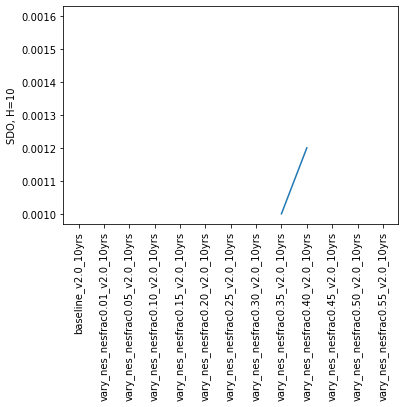

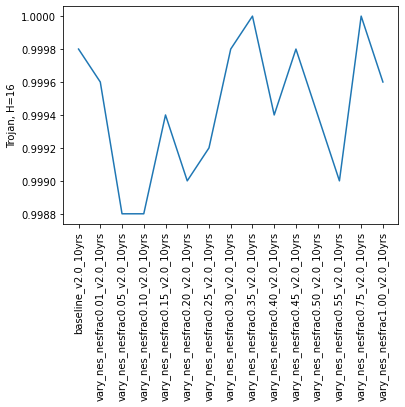

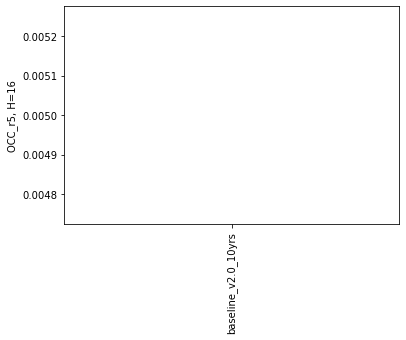

In [80]:
fig, ax = plt.subplots()
ax.plot(df['DifferentialCompleteness H = 21.000000 Discovery_N_Chances MBA 3 pairs in 15 nights trailing loss MoObjSlicer'][runs])
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('MBA, H=21')

fig, ax = plt.subplots()
ax.plot(df['DifferentialCompleteness H = 6.000000 Discovery_N_Chances TNO 3 pairs in 15 nights trailing loss MoObjSlicer'][runs])
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('TNO, H=6')

fig, ax = plt.subplots()
ax.plot(df['DifferentialCompleteness H = 10.000000 Discovery_N_Chances SDO 3 pairs in 15 nights trailing loss MoObjSlicer'][runs])
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('SDO, H=10')

fig, ax = plt.subplots()
ax.plot(df['DifferentialCompleteness H = 16.000000 Discovery_N_Chances Trojan 3 pairs in 15 nights trailing loss MoObjSlicer'][runs])
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('Trojan, H=16')

fig, ax = plt.subplots()
ax.plot(df['DifferentialCompleteness H = 16.000000 Discovery_N_Chances OCC_r20 3 pairs in 15 nights trailing loss MoObjSlicer'][runs])
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('OCC_r5, H=16')

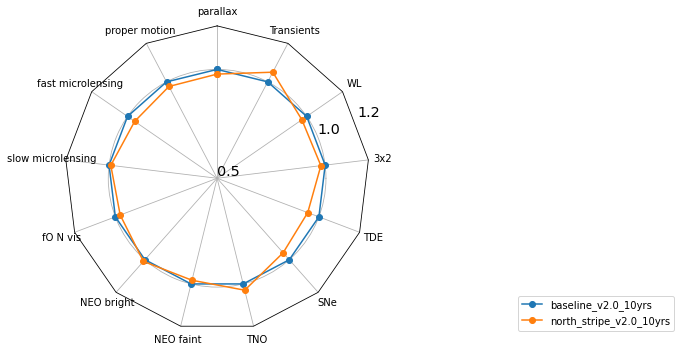

In [82]:
runs = ['baseline_v2.0_10yrs'] + [run for run in df.index if 'north' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0_10yrs')
fig, ax = radar(ndata, legend=True, rgrids=[0.5, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.tight_layout()

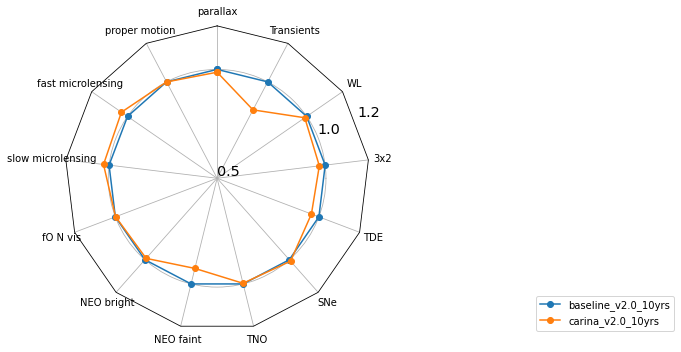

In [83]:
runs = ['baseline_v2.0_10yrs'] + [run for run in df.index if 'carina' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0_10yrs')
fig, ax = radar(ndata, legend=True, rgrids=[0.5, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.tight_layout()

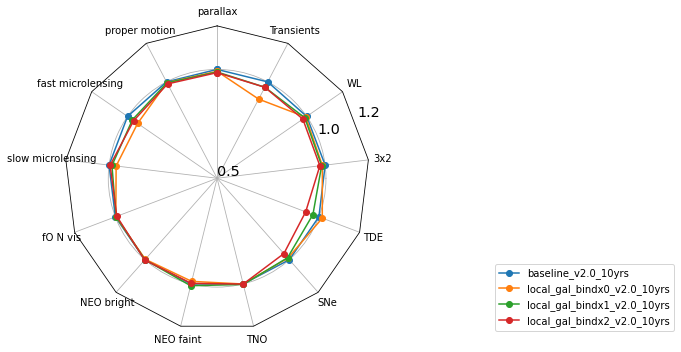

In [86]:
runs = ['baseline_v2.0_10yrs'] + [run for run in df.index if 'local' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0_10yrs')
fig, ax = radar(ndata, legend=True, rgrids=[0.5, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.tight_layout()

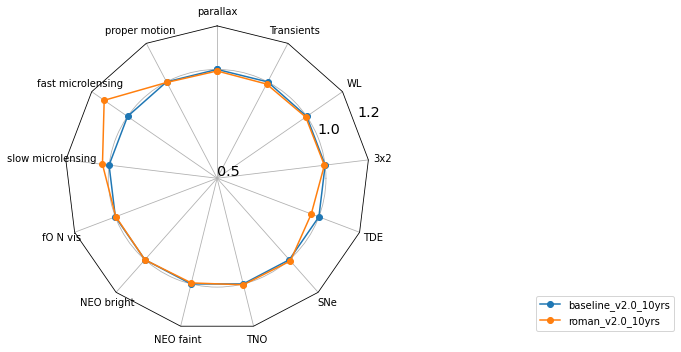

In [88]:
runs = ['baseline_v2.0_10yrs'] + [run for run in df.index if 'roman' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0_10yrs')
fig, ax = radar(ndata, legend=True, rgrids=[0.5, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.tight_layout()

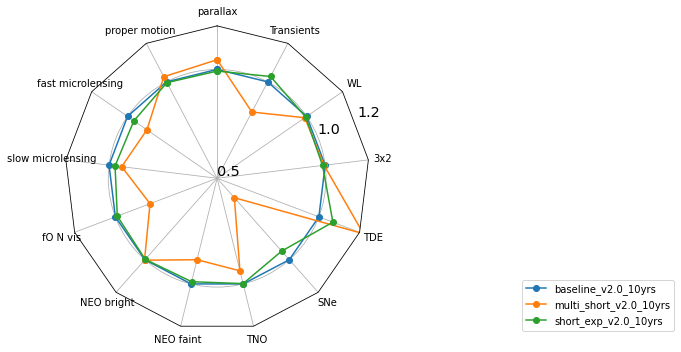

In [89]:
runs = ['baseline_v2.0_10yrs'] + [run for run in df.index if 'short' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0_10yrs')
fig, ax = radar(ndata, legend=True, rgrids=[0.5, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.tight_layout()

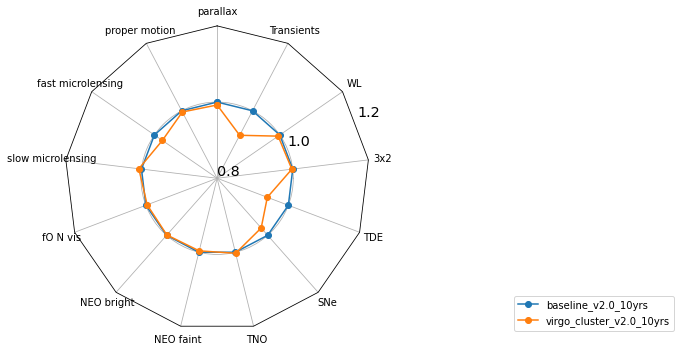

In [91]:
runs = ['baseline_v2.0_10yrs'] + [run for run in df.index if 'virgo' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0_10yrs')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.tight_layout()

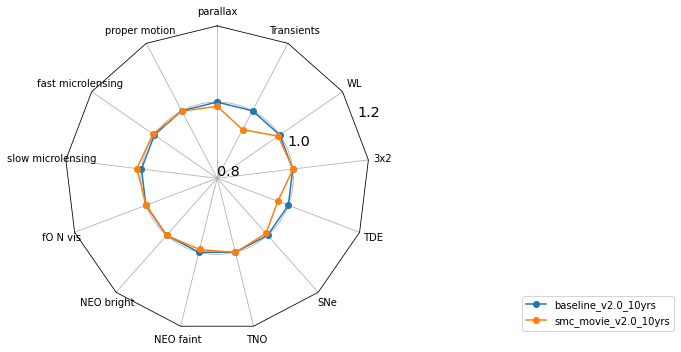

In [92]:
runs = ['baseline_v2.0_10yrs'] + [run for run in df.index if 'smc' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0_10yrs')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.tight_layout()

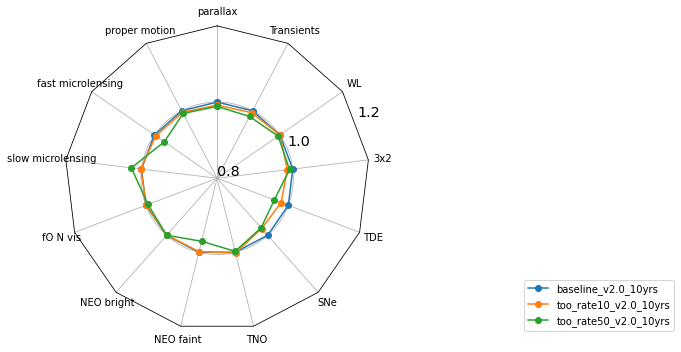

In [93]:
runs = ['baseline_v2.0_10yrs'] + [run for run in df.index if 'too' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0_10yrs')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.tight_layout()